# Déséquilibre en classification et Challenge

## 1 - Classification à partir d'un jeu de données déséquilibré 

### 1.1 Jeu de données artificiellement généré 

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
X,Y = make_classification(n_samples=150, n_features=20, n_informative=10,
                                n_redundant=5, n_repeated=5, n_classes=2,
                                n_clusters_per_class=2, weights=[0.9, 0.1],
                                flip_y=0.01, class_sep=1.5, hypercube=True)
cnames=["M","m"]

X_app,X_test,Y_app,Y_test=train_test_split(X,Y,test_size=0.30,random_state=12)

print("*********** Rapport avec déséquilibre ************") 

*********** Rapport avec déséquilibre ************


In [3]:
clf_dm = DummyClassifier(strategy="stratified") 
clf_dm.fit(X_app,Y_app)
y_pred_dm = clf_dm.predict(X_test)
print("Maj:",classification_report(Y_test, y_pred_dm, target_names=cnames))

Maj:               precision    recall  f1-score   support

           M       0.88      0.95      0.92        40
           m       0.00      0.00      0.00         5

    accuracy                           0.84        45
   macro avg       0.44      0.47      0.46        45
weighted avg       0.79      0.84      0.81        45



In [4]:
clf_nb = GaussianNB()
clf_nb.fit(X_app,Y_app)
y_pred_nb = clf_nb.predict(X_test)
print("NB: ",classification_report(Y_test, y_pred_nb, target_names=cnames))

NB:                precision    recall  f1-score   support

           M       1.00      0.95      0.97        40
           m       0.71      1.00      0.83         5

    accuracy                           0.96        45
   macro avg       0.86      0.97      0.90        45
weighted avg       0.97      0.96      0.96        45



In [5]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_app,Y_app)
y_pred_dt = clf_dt.predict(X_test)
print("DT: ",classification_report(Y_test, y_pred_nb, target_names=cnames))


DT:                precision    recall  f1-score   support

           M       1.00      0.95      0.97        40
           m       0.71      1.00      0.83         5

    accuracy                           0.96        45
   macro avg       0.86      0.97      0.90        45
weighted avg       0.97      0.96      0.96        45



In [6]:
clf_kppv = KNeighborsClassifier()
clf_kppv.fit(X_app,Y_app)
y_pred_kppv = clf_kppv.predict(X_test)
print("KP: ",classification_report(Y_test, y_pred_nb, target_names=cnames))

KP:                precision    recall  f1-score   support

           M       1.00      0.95      0.97        40
           m       0.71      1.00      0.83         5

    accuracy                           0.96        45
   macro avg       0.86      0.97      0.90        45
weighted avg       0.97      0.96      0.96        45



**Question 1**

Le code ci-dessus renvoie le rapport de classification de plusieurs classifieur sur un jeu de données déséquililbré. 

Le rapport renvoit comme information : 

- Precision : le rapport entre les vrais positifs et la somme des vrais et faux positifs. C'est l'exactitude du classifieur pour une classe. 
    - *Accuracy of positive predictions.*
    - *TP/(TP + FP)*
- Recall : mesure de la complétude du classifieur, c'est-à-dire la capacité d'un classifieur à trouver correctement toutes les instances positives.
    - *Fraction of positives that were correctly identified.*
    - *TP/(TP+FN)*
- f1-score : moyenne harmonique pondérée de la précision et du rappel
    - *En règle générale, la moyenne pondérée de F1 devrait être utilisée pour comparer les modèles de classificateurs, et non la précision globale.*
    - *2x(Recall x Precision) / (Recall + Precision)*
- Support : le nombre d'occurrences réelles de la classe dans l'ensemble de données spécifié


- macro avg : moyenne non pondérée 
- weighted avg : moyenne pondérée par le support (le nombre d'instances vraies pour chaque étiquette). Cela modifie " macro " pour prendre en compte le déséquilibre des étiquettes ; cela peut donner un score F qui ne se situe pas entre la précision et le rappel.

---
[Reference 1](https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html)
[Reference 2](https://muthu.co/understanding-the-classification-report-in-sklearn/)
[Reference 3](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support)

---

**Question 2** 

In [7]:
l_weights=[[0.1, 0.9],[0.2,0.8],[0.3,0.7],[0.5,0.5]]

for i in l_weights : 
    X,Y = make_classification(n_samples=150, n_features=20, n_informative=10,
                                n_redundant=5, n_repeated=5, n_classes=2,
                                n_clusters_per_class=2, weights=[0.9, 0.1],
                                flip_y=0.01, class_sep=1.5, hypercube=True)
    cnames=["M","m"]

    X_app,X_test,Y_app,Y_test=train_test_split(X,Y,test_size=0.30,random_state=12)

    print("*********** Rapport avec déséquilibre / weights = {0}************".format(i)) 
    
    clf_dm = DummyClassifier(strategy="stratified") 
    clf_dm.fit(X_app,Y_app)
    y_pred_dm = clf_dm.predict(X_test)
    print("Maj:",classification_report(Y_test, y_pred_dm, target_names=cnames))
    
    clf_nb = GaussianNB()
    clf_nb.fit(X_app,Y_app)
    y_pred_nb = clf_nb.predict(X_test)
    print("NB: ",classification_report(Y_test, y_pred_nb, target_names=cnames))

    clf_dt = DecisionTreeClassifier()
    clf_dt.fit(X_app,Y_app)
    y_pred_dt = clf_dt.predict(X_test)
    print("DT: ",classification_report(Y_test, y_pred_dt, target_names=cnames))

    clf_kppv = KNeighborsClassifier()
    clf_kppv.fit(X_app,Y_app)
    y_pred_kppv = clf_kppv.predict(X_test)
    print("KP: ",classification_report(Y_test, y_pred_kppv, target_names=cnames))

*********** Rapport avec déséquilibre / weights = [0.1, 0.9]************
Maj:               precision    recall  f1-score   support

           M       0.97      0.86      0.91        43
           m       0.14      0.50      0.22         2

    accuracy                           0.84        45
   macro avg       0.56      0.68      0.57        45
weighted avg       0.94      0.84      0.88        45

NB:                precision    recall  f1-score   support

           M       1.00      0.98      0.99        43
           m       0.67      1.00      0.80         2

    accuracy                           0.98        45
   macro avg       0.83      0.99      0.89        45
weighted avg       0.99      0.98      0.98        45

DT:                precision    recall  f1-score   support

           M       0.95      0.95      0.95        43
           m       0.00      0.00      0.00         2

    accuracy                           0.91        45
   macro avg       0.48      0.48      0

La diminution du déséquilibre permet d'observer une amélioration des résultats pour certains modèles, tandis que d'autres parraissent meilleurs lorsque le weight est déséquilibré. 

### 1.2 Sur de vraies données  

**Question 1**

In [8]:
from sklearn.datasets import load_breast_cancer

In [9]:
data = load_breast_cancer()

In [10]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30,random_state=12)

In [11]:
cnames=list(data.target_names)

print("*********** Rapport avec déséquilibre ************") 

clf_dm = DummyClassifier(strategy="stratified") 
clf_dm.fit(X_train,Y_train)
y_pred_dm = clf_dm.predict(X_test)
print("Maj:",classification_report(Y_test, y_pred_dm, target_names=cnames))

clf_nb = GaussianNB()
clf_nb.fit(X_train,Y_train)
y_pred_nb = clf_nb.predict(X_test)
print("NB: ",classification_report(Y_test, y_pred_nb, target_names=cnames))

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train,Y_train)
y_pred_dt = clf_dt.predict(X_test)
print("DT: ",classification_report(Y_test, y_pred_dt, target_names=cnames))

clf_kppv = KNeighborsClassifier()
clf_kppv.fit(X_train,Y_train)
y_pred_kppv = clf_kppv.predict(X_test)
print("KP: ",classification_report(Y_test, y_pred_kppv, target_names=cnames))

*********** Rapport avec déséquilibre ************
Maj:               precision    recall  f1-score   support

   malignant       0.38      0.36      0.37        64
      benign       0.63      0.64      0.64       107

    accuracy                           0.54       171
   macro avg       0.50      0.50      0.50       171
weighted avg       0.53      0.54      0.54       171

NB:                precision    recall  f1-score   support

   malignant       0.95      0.84      0.89        64
      benign       0.91      0.97      0.94       107

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171

DT:                precision    recall  f1-score   support

   malignant       0.87      0.86      0.87        64
      benign       0.92      0.93      0.92       107

    accuracy                           0.90       171
   macro avg       0.89      0.89      0.89       171
weighted

**Question 2**

In [12]:
from collections import Counter
from random import randint

In [14]:
while max(Counter(y).values()) - min(Counter(y).values()) != 0:
    i = randint(0, len(y))
    if y[i] == 1 : 
        X = np.delete(X,(i),axis=0)
        y = np.delete(y,i)
print(Counter(y).values())

dict_values([212, 212])


In [15]:
print(X.shape)
print(y.shape)

(424, 30)
(424,)


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30,random_state=12)

In [17]:
print("*********** Rapport avec déséquilibre ************") 

clf_dm = DummyClassifier(strategy="stratified") 
clf_dm.fit(X_train,Y_train)
y_pred_dm = clf_nb.predict(X_test)
print("Maj:",classification_report(Y_test, y_pred_dm, target_names=cnames))

clf_nb = GaussianNB()
clf_nb.fit(X_train,Y_train)
y_pred_nb = clf_nb.predict(X_test)
print("NB: ",classification_report(Y_test, y_pred_nb, target_names=cnames))

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train,Y_train)
y_pred_dt = clf_dt.predict(X_test)
print("DT: ",classification_report(Y_test, y_pred_dt, target_names=cnames))

clf_kppv = KNeighborsClassifier()
clf_kppv.fit(X_train,Y_train)
y_pred_kppv = clf_kppv.predict(X_test)
print("KP: ",classification_report(Y_test, y_pred_kppv, target_names=cnames))

*********** Rapport avec déséquilibre ************
Maj:               precision    recall  f1-score   support

   malignant       0.96      0.89      0.93        57
      benign       0.92      0.97      0.95        71

    accuracy                           0.94       128
   macro avg       0.94      0.93      0.94       128
weighted avg       0.94      0.94      0.94       128

NB:                precision    recall  f1-score   support

   malignant       0.96      0.88      0.92        57
      benign       0.91      0.97      0.94        71

    accuracy                           0.93       128
   macro avg       0.93      0.92      0.93       128
weighted avg       0.93      0.93      0.93       128

DT:                precision    recall  f1-score   support

   malignant       0.91      0.93      0.92        57
      benign       0.94      0.93      0.94        71

    accuracy                           0.93       128
   macro avg       0.93      0.93      0.93       128
weighted

**Question 3**

1ère technique

In [18]:
X, y = load_breast_cancer(return_X_y=True)

In [19]:
while max(Counter(y).values()) != min(Counter(y).values()):
    i = randint(0, len(y)-1)
    if y[i] == 0 :
        X = np.append(X,[X[i]], axis = 0)
        y = np.append(y,[y[i]], axis = 0)

print(Counter(y).values())

dict_values([357, 357])


In [20]:
print(X.shape)
print(y.shape)

(714, 30)
(714,)


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30,random_state=12)

In [22]:
print("*********** Rapport avec déséquilibre ************") 

clf_dm = DummyClassifier(strategy="stratified") 
clf_dm.fit(X_train,Y_train)
y_pred_dm = clf_nb.predict(X_test)
print("Maj:",classification_report(Y_test, y_pred_dm, target_names=cnames))

clf_nb = GaussianNB()
clf_nb.fit(X_train,Y_train)
y_pred_nb = clf_nb.predict(X_test)
print("NB: ",classification_report(Y_test, y_pred_nb, target_names=cnames))

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train,Y_train)
y_pred_dt = clf_dt.predict(X_test)
print("DT: ",classification_report(Y_test, y_pred_dt, target_names=cnames))

clf_kppv = KNeighborsClassifier()
clf_kppv.fit(X_train,Y_train)
y_pred_kppv = clf_kppv.predict(X_test)
print("KP: ",classification_report(Y_test, y_pred_kppv, target_names=cnames))

*********** Rapport avec déséquilibre ************
Maj:               precision    recall  f1-score   support

   malignant       0.99      0.88      0.93       117
      benign       0.87      0.99      0.93        98

    accuracy                           0.93       215
   macro avg       0.93      0.94      0.93       215
weighted avg       0.94      0.93      0.93       215

NB:                precision    recall  f1-score   support

   malignant       0.98      0.87      0.92       117
      benign       0.86      0.98      0.92        98

    accuracy                           0.92       215
   macro avg       0.92      0.93      0.92       215
weighted avg       0.93      0.92      0.92       215

DT:                precision    recall  f1-score   support

   malignant       0.93      0.94      0.94       117
      benign       0.93      0.92      0.92        98

    accuracy                           0.93       215
   macro avg       0.93      0.93      0.93       215
weighted

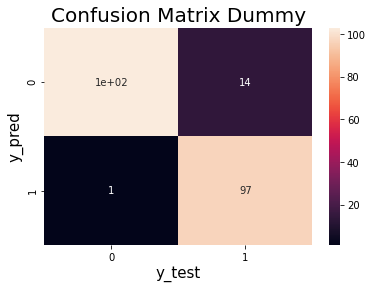

In [23]:
sns.heatmap(confusion_matrix(Y_test, y_pred_dm), annot = True)
plt.title('Confusion Matrix Dummy', fontsize = 20) 
plt.xlabel('y_test', fontsize = 15) 
plt.ylabel('y_pred', fontsize = 15) 
plt.show()

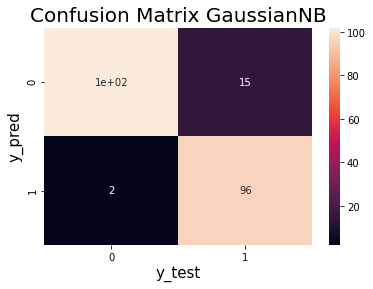

In [24]:
sns.heatmap(confusion_matrix(Y_test, y_pred_nb), annot = True)
plt.title('Confusion Matrix GaussianNB', fontsize = 20) 
plt.xlabel('y_test', fontsize = 15) 
plt.ylabel('y_pred', fontsize = 15) 
plt.show()

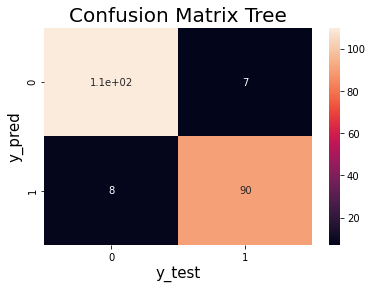

In [25]:
sns.heatmap(confusion_matrix(Y_test, y_pred_dt), annot = True)
plt.title('Confusion Matrix Tree', fontsize = 20) 
plt.xlabel('y_test', fontsize = 15) 
plt.ylabel('y_pred', fontsize = 15) 
plt.show()

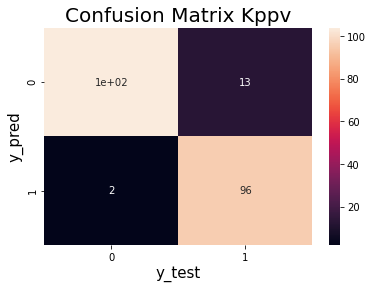

In [26]:
sns.heatmap(confusion_matrix(Y_test, y_pred_kppv), annot = True)
plt.title('Confusion Matrix Kppv', fontsize = 20) 
plt.xlabel('y_test', fontsize = 15) 
plt.ylabel('y_pred', fontsize = 15) 
plt.show()

2ème technique

In [27]:
X, y = load_breast_cancer(return_X_y=True)

In [28]:
while max(Counter(y).values()) != min(Counter(y).values()):
    i = randint(0, len(y)-1)
    if y[i] == 0 :
        mu = abs(np.mean(y[i]))
        sigma = np.std(y[i])
        noise = np.random.normal(mu, sigma, 30)
        noisy = X[i].copy()
        noisy += noise
        X = np.append(X,[noisy], axis = 0)
        y = np.append(y,[y[i]], axis = 0)

print(Counter(y).values())

dict_values([357, 357])


In [29]:
print(X.shape)
print(y.shape)

(714, 30)
(714,)


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30,random_state=12)

In [31]:
print("*********** Rapport avec déséquilibre ************") 

clf_nb = DummyClassifier(strategy="stratified") 
clf_nb.fit(X_train,Y_train)
y_pred_nb = clf_nb.predict(X_test)
print("Maj:",classification_report(Y_test, y_pred_nb, target_names=cnames))

clf_nb = GaussianNB()
clf_nb.fit(X_train,Y_train)
y_pred_nb = clf_nb.predict(X_test)
print("NB: ",classification_report(Y_test, y_pred_nb, target_names=cnames))

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train,Y_train)
y_pred_nb = clf_dt.predict(X_test)
print("DT: ",classification_report(Y_test, y_pred_nb, target_names=cnames))

clf_kppv = KNeighborsClassifier()
clf_kppv.fit(X_train,Y_train)
y_pred_nb = clf_kppv.predict(X_test)
print("KP: ",classification_report(Y_test, y_pred_nb, target_names=cnames))

*********** Rapport avec déséquilibre ************
Maj:               precision    recall  f1-score   support

   malignant       0.57      0.53      0.55       117
      benign       0.48      0.52      0.50        98

    accuracy                           0.53       215
   macro avg       0.52      0.53      0.52       215
weighted avg       0.53      0.53      0.53       215

NB:                precision    recall  f1-score   support

   malignant       0.97      0.87      0.92       117
      benign       0.86      0.97      0.91        98

    accuracy                           0.92       215
   macro avg       0.92      0.92      0.92       215
weighted avg       0.92      0.92      0.92       215

DT:                precision    recall  f1-score   support

   malignant       0.98      0.95      0.97       117
      benign       0.94      0.98      0.96        98

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted

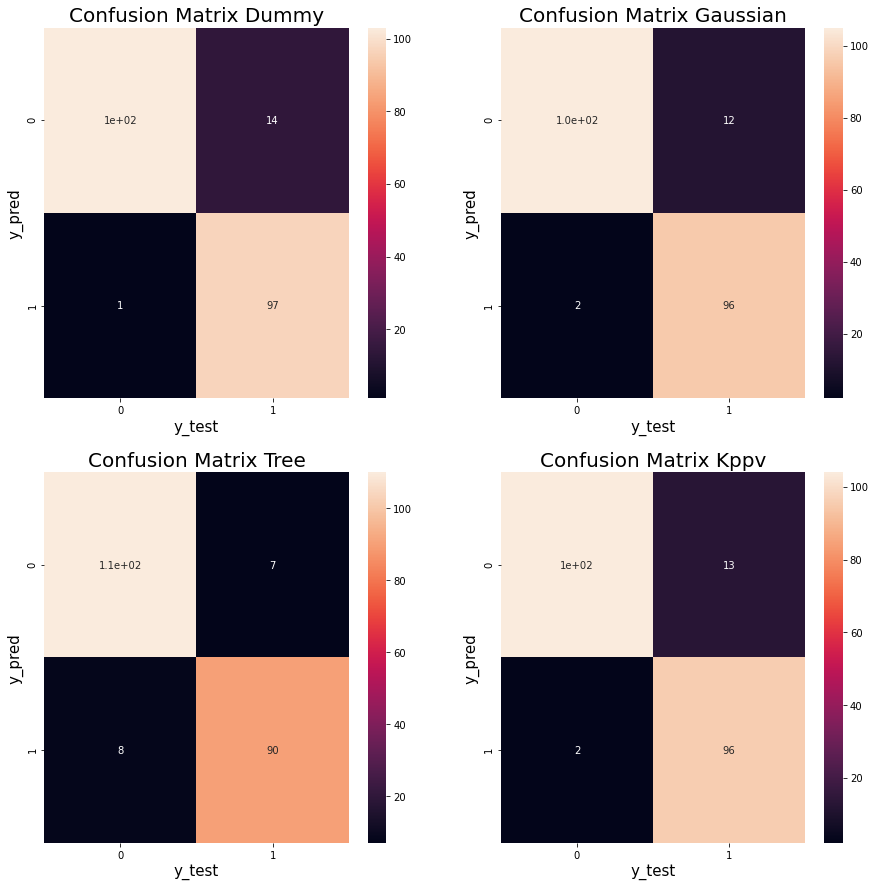

In [32]:
plt.figure(4,figsize=(15,15))

plt.subplot(221)
sns.heatmap(confusion_matrix(Y_test, y_pred_dm), annot = True)
plt.title('Confusion Matrix Dummy', fontsize = 20) 
plt.xlabel('y_test', fontsize = 15) 
plt.ylabel('y_pred', fontsize = 15) 


plt.subplot(222)
sns.heatmap(confusion_matrix(Y_test, y_pred_nb), annot = True)
plt.title('Confusion Matrix Gaussian', fontsize = 20) 
plt.xlabel('y_test', fontsize = 15) 
plt.ylabel('y_pred', fontsize = 15) 



plt.subplot(223)
sns.heatmap(confusion_matrix(Y_test, y_pred_dt), annot = True)
plt.title('Confusion Matrix Tree', fontsize = 20) 
plt.xlabel('y_test', fontsize = 15) 
plt.ylabel('y_pred', fontsize = 15) 


plt.subplot(224)
sns.heatmap(confusion_matrix(Y_test, y_pred_kppv), annot = True)
plt.title('Confusion Matrix Kppv', fontsize = 20) 
plt.xlabel('y_test', fontsize = 15) 
plt.ylabel('y_pred', fontsize = 15) 

plt.show()

## 2 - Challenge sur donnees réelles (Kaggle), pour pratiquer

In [33]:
import pandas as pd
from sklearn import preprocessing

df = pd.read_csv('titanic.csv', sep = ';')
le = preprocessing.LabelEncoder()

In [34]:
df['Sex'] = le.fit_transform(df['Sex'])

In [ ]:
nb_manquantes = len(df['Embarked'][df.Embarked.isnull()])
val_remplacement = df['Embarked'].dropna().mode().values
df['Embarked'][df['Embarked'].isnull()] = val_remplacement

print(df.iloc[96,11])
print(df.iloc[99,11])

Les deux valeurs manquantes ont été remplacées par la valeur S, qui est présente en majorité dans la colonne Embarked.

In [ ]:
df['Embarked'] = le.fit_transform(df['Embarked'])

In [ ]:
X_train = df['Survived']

In [ ]:
df = df.drop(['Survived', 'Cabin', 'Name', 'Ticket', 'PassengerId','Fare'], axis=1)